In [603]:
import pandas as pd
import matplotlib.pyplot as plt

In [604]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [605]:
from sklearn.model_selection import train_test_split

target = 'price_change'

train = data.sample(frac=0.8, random_state=4619)
test = data.drop(train.index).sample(frac=1.0, random_state=4619)

y_train = train[target]
x_train = train.drop(columns=target)

y_test = test[target]
x_test = test.drop(columns=target)

In [606]:
from sklearn import svm

modelo = svm.LinearSVC()
modelo.fit(x_train, y_train)

LinearSVC()

In [607]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo.predict(x_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred=y_pred, y_true=y_test)))
print("Precision: {:.3f}".format(precision_score(y_pred=y_pred, y_true=y_test)))
print("Recall: {:.3f}".format(recall_score(y_pred=y_pred, y_true=y_test)))
print("F1 Score: {:.3f}".format(f1_score(y_pred=y_pred, y_true=y_test)))

Accuracy: 0.775
Precision: 0.778
Recall: 0.737
F1 Score: 0.757


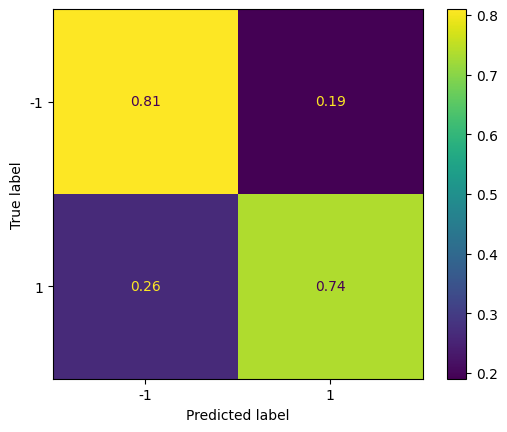

In [608]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')